![LDA](https://pbs.twimg.com/media/FcKLEBgWAAALFLN?format=jpg&name=medium)

Linear Discriminant Analysis, or LDA for short, is a predictive modeling algorithm for multi-class classification. It can also be used as a dimensionality reduction technique, providing a projection of a training dataset that best separates the examples by their assigned class.

[Click to see my article on LDA](https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>
<b>Wine Dataset: </b>These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are: 
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

https://archive.ics.uci.edu/ml/datasets/wine

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>Import the Dataset

In [2]:
df = pd.read_csv('Dataset/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Information and Visualization </font>

#### <font color = blue> Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### <font color = blue> Visualize Target Class Label Distributiuon

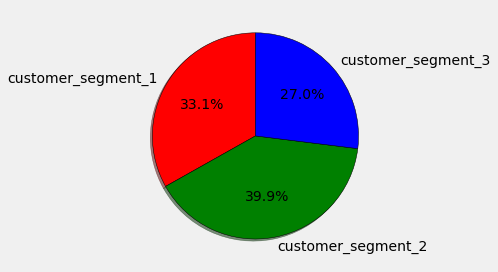

In [4]:
plt.style.use('fivethirtyeight')

seg1 = df[df['Customer_Segment'] == 1].shape[0]
seg2 = df[df['Customer_Segment'] == 2].shape[0]
seg3 = df[df['Customer_Segment'] == 3].shape[0]


class_ = [seg1, seg2, seg3]
label = ['customer_segment_1', 'customer_segment_2', 'customer_segment_3']

plt.pie(class_, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green', 'blue'])

plt.tight_layout()
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and Target Attributes </font>

In [5]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attributes

In [6]:
X.tail(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


#### <font color = blue> Target Attribute

In [7]:
Y.head(3)

0    1
1    1
2    1
Name: Customer_Segment, dtype: int64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Split the Data into Training and Testing </font>

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, 
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)

#### <font color = blue> Training Data

In [9]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (142, 13)
Y_train (142,)


#### <font color = blue> Testing Data

In [10]:
print("X_test", X_test.shape)
print("X_test", Y_test.shape)

X_test (36, 13)
X_test (36,)


### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Check Missing Value </font>

In [11]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Feature Scaling </font>

In [12]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Feature Extraction using LDA </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#### <font color = blue> Initialize the PCA

In [14]:
lda = LDA(n_components = 2)

#### <font color = blue> fitting the pca model

In [16]:
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

#### <font color = blue> explained the variance

In [17]:
explained_varience = lda.explained_variance_ratio_
explained_varience

array([0.73931691, 0.26068309])

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build Logistic Regression </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import Model From Sklearn

In [18]:
from sklearn.linear_model import LogisticRegression

#### <font color = blue> Initialize Model

In [19]:
LG = LogisticRegression(random_state=0)

#### <font color = blue> Fit the Training Data into Model

In [20]:
LG.fit(X_train,Y_train)

LogisticRegression(random_state=0)

#### <font color = blue> Predict the Test data

In [21]:
Y_pred=LG.predict(X_test)
Y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluation the Results and Visualize</font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Visualize the Result </font>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


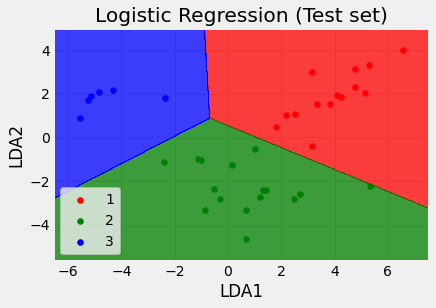

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali